In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt


In [3]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 48s 0us/step


In [4]:
to_categorical=to_categorical
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [5]:
# Build the MLP model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))


c:\Users\Sahana\OneDrive\Desktop\AIML\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
#compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy']) 


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7036 - loss: 0.8291 - val_accuracy: 0.4819 - val_loss: 1.8128
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7049 - loss: 0.8212 - val_accuracy: 0.4919 - val_loss: 1.7915
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7105 - loss: 0.8109 - val_accuracy: 0.4850 - val_loss: 1.8102
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7091 - loss: 0.8104 - val_accuracy: 0.4922 - val_loss: 1.8437
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7056 - loss: 0.8176 - val_accuracy: 0.4850 - val_loss: 1.8184
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7076 - loss: 0.8076 - val_accuracy: 0.4857 - val_loss: 1.8711
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7111 - loss: 0.8042 - val_accuracy: 0.4845 - val_loss: 1.8532
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7187 - loss: 0.7888 - val_accu

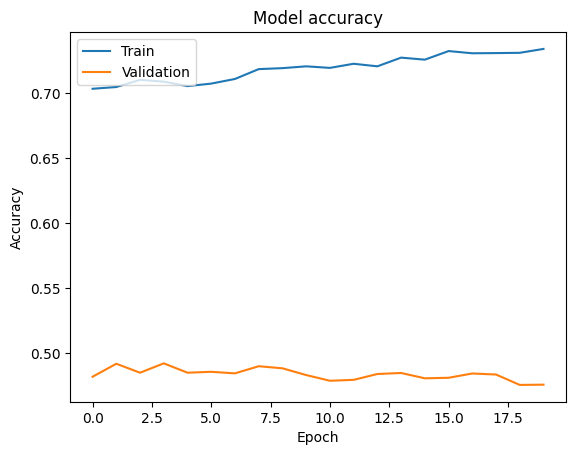

In [10]:
#train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)   
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')
# Plot training & validation accuracy values
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
#experiment with depth(number of hidden layers)

c:\Users\Sahana\OneDrive\Desktop\AIML\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.2937 - loss: 1.9417 - val_accuracy: 0.3382 - val_loss: 1.8153
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.3795 - loss: 1.7222 - val_accuracy: 0.3757 - val_loss: 1.7281
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.4105 - loss: 1.6380 - val_accuracy: 0.4136 - val_loss: 1.6289
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.4376 - loss: 1.5606 - val_accuracy: 0.4264 - val_loss: 1.5954
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.4579 - loss: 1.5109 - val_accuracy: 0.4482 - val_loss: 1.5415
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.4722 - loss: 1.4708 - val_accuracy: 0.4606 - val_loss: 1.5151
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.4857 - loss: 1.4347 - val_accuracy: 0.4654 - val_loss: 1.5125
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.5005 - loss: 1.3956 - 

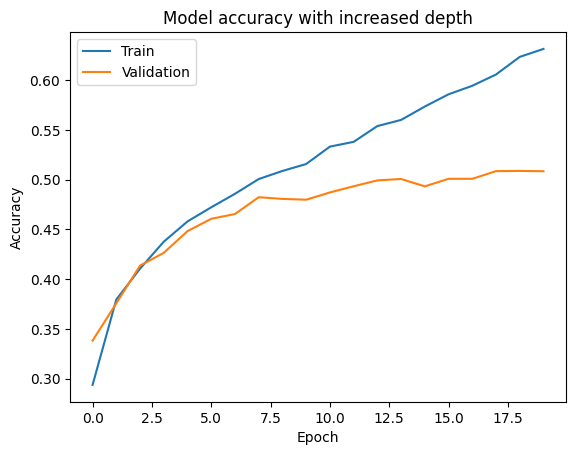

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical 
from keras.datasets import cifar10
from keras.optimizers import Adam
import matplotlib.pyplot as plt
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()  
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Build the MLP model with increased depth  
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))#flattening the input
model.add(Dense(1024, activation='relu'))#first hidden layer
model.add(Dense(512, activation='relu'))#second hidden layer
model.add(Dense(256, activation='relu'))#third hidden layer
model.add(Dense(128, activation='relu'))#fourth hidden layer
model.add(Dense(10, activation='softmax'))#output layer
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy']) 
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)   
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy with increased depth: {test_accuracy:.4f}')
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with increased depth')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')   
plt.show()  

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.3341 - loss: 1.8451 - val_accuracy: 0.3657 - val_loss: 1.7317
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.4104 - loss: 1.6484 - val_accuracy: 0.4154 - val_loss: 1.6476
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.4414 - loss: 1.5654 - val_accuracy: 0.4336 - val_loss: 1.5742
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.4628 - loss: 1.5074 - val_accuracy: 0.4521 - val_loss: 1.5400
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.4808 - loss: 1.4553 - val_accuracy: 0.4621 - val_loss: 1.5305
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.4941 - loss: 1.4184 - val_accuracy: 0.4683 - val_loss: 1.5404
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.5074 - loss: 1.3762 - val_accuracy: 0.4746 - val_loss: 1.4900
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5206 - loss: 1.3491 - val_accu

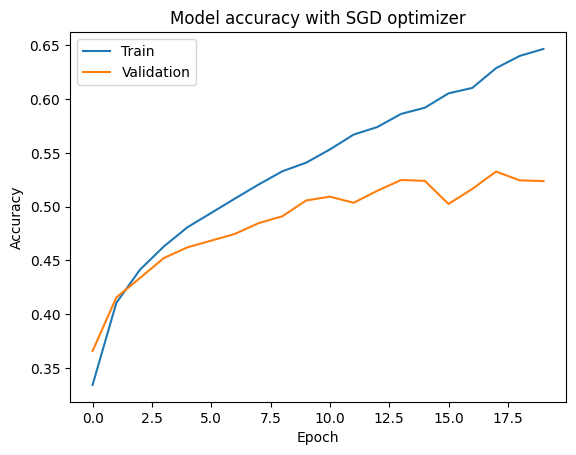

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0   
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)   
y_test = to_categorical(y_test, num_classes=10)
# Build the MLP model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3))) 
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu')) 
model.add(Dense(10, activation='softmax'))
# Compile the model with SGD optimizer  
# Using SGD
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy with SGD optimizer: {test_accuracy:.4f}')
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with SGD optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

c:\Users\Sahana\OneDrive\Desktop\AIML\.venv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.2397 - loss: 2.1813 - val_accuracy: 0.2990 - val_loss: 1.9226
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.3392 - loss: 1.8287 - val_accuracy: 0.3188 - val_loss: 1.9456
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.3798 - loss: 1.7268 - val_accuracy: 0.3913 - val_loss: 1.6890
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.4046 - loss: 1.6572 - val_accuracy: 0.3975 - val_loss: 1.6944
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.4291 - loss: 1.5977 - val_accuracy: 0.3887 - val_loss: 1.7139
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.4404 - loss: 1.5532 - val_accuracy: 0.4157 - val_loss: 1.6658
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4547 - loss: 1.5181 - val_accuracy: 0.4400 - val_loss: 1.5759
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.4715 - loss: 1.4771 - 

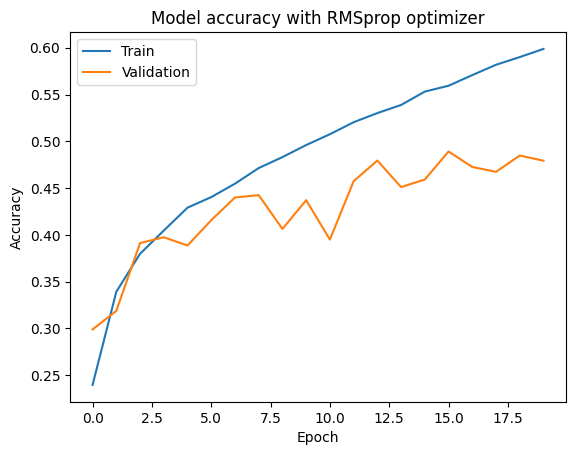

In [8]:
#rmsprop
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Build the MLP model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile the model with RMSprop optimizer
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model

history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy with RMSprop optimizer: {test_accuracy:.4f}')
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])   
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy with RMSprop optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')   
plt.show()